# Using Linear Regression

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load the data
data = pd.read_csv(r"C:\Users\RAHUL ADITYA\Documents\ICT\car_age_price.csv")

data.tail()



,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


<AxesSubplot:xlabel='Year', ylabel='Price'>

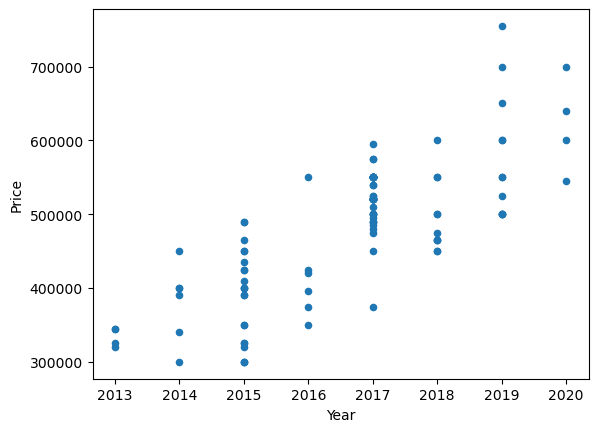

In [12]:
data.plot(x='Year', y='Price', kind='scatter')

In [18]:
# split the data into training and testing sets
X = data['Year'].values.reshape(-1, 1)
y = data['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
# fit a linear regression model to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
# evaluate the performance of the model using the testing data
y_pred = regressor.predict(X_test)
print('Coefficient of determination (R^2): {:.2f}'.format(regressor.score(X_test, y_test)))

Coefficient of determination (R^2): 0.54


In [22]:
# use the model to predict the price of a 2022 model second-hand grand i10
year_2022 = np.array([2022]).reshape(-1, 1)
price_2022 = regressor.predict(year_2022)
print('Predicted price of a 2022 model second-hand grand i10: {:.2f}'.format(price_2022[0]))

Predicted price of a 2022 model second-hand grand i10: 706492.63


# Using Lasso Regression

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# load the data
data = pd.read_csv(r"C:\Users\RAHUL ADITYA\Documents\ICT\car_age_price.csv")

In [28]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


<AxesSubplot:xlabel='Year', ylabel='Price'>

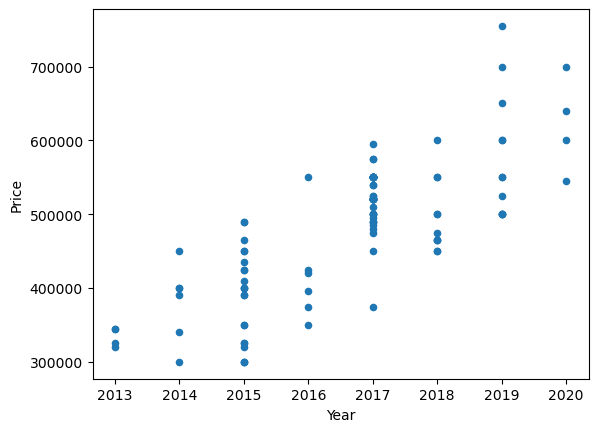

In [30]:
# plot the data
data.plot(x='Year', y='Price', kind='scatter')

In [32]:
# split the data into training and testing sets
X = data['Year'].values.reshape(-1, 1)
y = data['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit a Lasso regression model to the training data
regressor = Lasso(alpha=0.1)
regressor.fit(X_train, y_train)

# evaluate the performance of the model using the testing data
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination (R^2): {:.2f}'.format(r2))

Coefficient of determination (R^2): 0.54


In [34]:
# use the model to predict the price of a 2022 model second-hand grand i10
year_2022 = np.array([2022]).reshape(-1, 1)
year_2022_scaled = scaler.transform(year_2022)
price_2022 = regressor.predict(year_2022_scaled)
print('Predicted price of a 2022 model second-hand grand i10: {:.2f}'.format(price_2022[0]))

Predicted price of a 2022 model second-hand grand i10: 706492.32


Linear Regression :   Coefficient of determination (R^2): 0.54
Lasso Regression : Coefficient of determination (R^2): 0.54

Since the metric Coefficient of determination (R^2) is same in this case, we can conclude that the performance of both the models are similar